In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import numpy as np

In [3]:
BETA = 2e-2
LAMBDA = 0.1
vt = 0.7

In [4]:
def f1(x,y,l):  #IDS
    return  BETA*((x-vt)*y-1/2*pow(y,2)) * (1+l*y)

def f2(x,y,l):  #IDS
    return 0.5*BETA*pow(x-vt,2) * (1+l*y)

# def f4(x,y,l):
#     vt=0.7
#     ret = f1(x,y,l)
#     for i in range(len(y)):
#             if x[i]-vt>y[i]:
#                 ret[i] = f2(x[i],y[i],l)
#     return ret

def f5(x,y,l):
#     factor=1
#     if y<0:
#         y = -y
#         factor=-1
    if (x-vt > y):
#         if (x == 2 and y == -5.0):
#             print(f1(x,y,l) + (y-9)/3e3)
        return (f1(x,y,l) + (y-9)/3e3)#*factor
    else:
#         if (x == 2 and y == -5.0):
#             print(f1(x,y,l) + (y-9)/3e3)
        return (f2(x,y,l) + (y-9)/3e3)#*factor

def f5d1(x,y,l):
#     factor=1
#     if y<0:
#         y = -y
#         factor=-1
    if (x-vt > y):
        return BETA*y*(1+l*y)#*factor
    else:
        return BETA*(x-vt)*(1+l*y)#*factor

def f5d2(x,y,l):
#     factor=1
#     if y<0:
#         y = -y
#         factor=-1
    if (x-vt>y):
        return (BETA*((x-vt)+2*l*y*(x-vt)-y-3/2*l*pow(y,2)) + 1/3e3)#*factor
    else:
        return (BETA/2*l*pow(x-vt,2) + 3/1e3)#*factor
    
def f6(x,y,l):
    return (x-9)/1e3+x/2e3

def f6d1(x,y,l):
    return 1/1e3 + 1/2e3

def f6d2(x,y,l):
    return 0

def findDelta(x,y,l=LAMBDA):
    f1x = f5d1(x,y,l)
    f1y = f5d2(x,y,l)
    f2x = f6d1(x,y,l)
    f2y = f6d2(x,y,l)
    invmatrix = np.linalg.inv(np.array([[f1x,f1y],
                                        [f2x,f2y]]))
    fmatrix = np.array([f5(x,y,l),f6(x,y,l)])
    return -np.matmul(invmatrix,fmatrix)

def findFunction(x,y,l=LAMBDA):
    return np.array([f5(x,y,l),f6(x,y,l)])
absdij

NameError: name 'absdij' is not defined

In [5]:
X, Y = np.meshgrid(np.arange(-1, 15, 0.1,dtype='float64'), np.arange(-11, 11, 0.1,dtype='float64'))
Xp, Yp = np.meshgrid(np.arange(-1, 16, 2,dtype='float64'), np.arange(-11, 12, 2,dtype='float64'))

x_shape = X.shape
xp_shape = Xp.shape

In [6]:
F1 = np.zeros_like(X)
F1X = np.zeros_like(X)
F1Y = np.zeros_like(X)

F2 = np.zeros_like(X)
F2X = np.zeros_like(X)
F2Y = np.zeros_like(X)

F3X = np.zeros_like(X)
F3Y = np.zeros_like(X)

for i in range(len(X)):
    for j in range(len(X[i])):
        x = X[i][j]
        y = Y[i][j]
        F1[i][j] = f5(x,y,LAMBDA)
        if (x == 2 and y == -5):
            print(F1[i][j])
        F2[i,j] = f6(x,y,LAMBDA)
        

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        F1X[i,j] = f5d1(X[i,j],Y[i,j],LAMBDA)
        F1Y[i,j] = f5d2(X[i,j],Y[i,j],LAMBDA)
        F2X[i,j] = f6d1(X[i,j],Y[i,j],LAMBDA)
        F2Y[i,j] = f6d2(X[i,j],Y[i,j],LAMBDA)
        
        invmatrix = np.linalg.inv(np.array([[F1X[i,j],F1Y[i,j]],
                              [F2X[i,j],F2Y[i,j]]]))
        F3X[i,j],F3Y[i,j] = -np.matmul(invmatrix,np.array([F1[i,j],F2[i,j]]))
        
        
        
        
        
        
        
        
F1p = np.zeros_like(Xp)
F1Xp = np.zeros_like(Xp)
F1Yp = np.zeros_like(Xp)

F2p = np.zeros_like(Xp)
F2Xp = np.zeros_like(Xp)
F2Yp = np.zeros_like(Xp)

F3Xp = np.zeros_like(Xp)
F3Yp = np.zeros_like(Xp)

for i in range(len(Xp)):
    for j in range(len(Xp[i])):
        x = Xp[i][j]
        y = Yp[i][j]
        F1p[i][j] = f5(x,y,LAMBDA) + (y-9)/1e3
        F2p[i,j] = f6(x,y,LAMBDA)
        

for i in range(xp_shape[0]):
    for j in range(xp_shape[1]):
        F1Xp[i,j] = f5d1(Xp[i,j],Yp[i,j],LAMBDA)
        F1Yp[i,j] = f5d2(Xp[i,j],Yp[i,j],LAMBDA)
        F2Xp[i,j] = f6d1(Xp[i,j],Yp[i,j],LAMBDA)
        F2Yp[i,j] = f6d2(Xp[i,j],Yp[i,j],LAMBDA)
        
        invmatrix = np.linalg.inv(np.array([[F1Xp[i,j],F1Yp[i,j]],
                              [F2Xp[i,j],F2Yp[i,j]]]))
        F3Xp[i,j],F3Yp[i,j] = -np.matmul(invmatrix,np.array([F1p[i,j],F2p[i,j]]))

mag = np.sqrt(F3Xp*F3Xp + F3Yp*F3Yp)
quiverX = F3Xp/mag
quiverY = F3Yp/mag
color = np.log(mag,np.zeros_like(mag)+2)
color

array([[1.98785294, 1.64756611, 1.15806825, 0.27579831, 0.20777917,
        1.11932692, 1.61525838, 1.94827255, 2.19838666],
       [2.1967722 , 1.76057072, 1.28474638, 0.60052649, 0.45872982,
        1.15384176, 1.62472532, 1.95196044, 2.20013421],
       [4.03984384, 3.77061112, 2.76516524, 2.25882757, 1.93485935,
        1.81385304, 1.89510015, 2.07033126, 2.25777001],
       [2.86703917, 2.82664415, 2.797779  , 2.78269649, 2.78269649,
        2.797779  , 2.82664415, 2.86703917, 2.9162752 ],
       [2.8220057 , 2.28341546, 1.88045699, 1.51812595, 1.3185907 ,
        1.44919653, 1.72959457, 1.9967249 , 2.22231165],
       [3.55315189, 1.98791853, 1.30979486, 0.52686708, 0.34488059,
        1.13165994, 1.61772583, 1.94898531, 2.19863494],
       [3.72466055, 2.20319111, 1.43152641, 0.43556052, 0.21767828,
        1.11442571, 1.61300044, 1.94714677, 2.19776576],
       [3.87166459, 2.44663479, 3.37162997, 1.7491875 , 0.99369669,
        1.2254083 , 1.6368589 , 1.95483894, 2.20094222],


0.0
-0.03920000000000001


d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


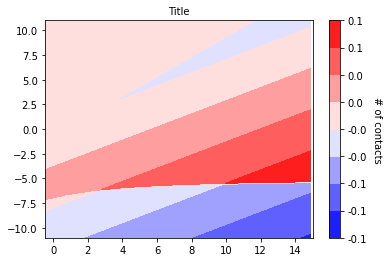

In [198]:
fig,ax = plt.subplots()


#colormap
cmap = cm.ListedColormap(plt.cm.plasma(10), "name")



plt.rcParams['contour.negative_linestyle'] = 'solid'
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

def convexity1(x,y):
    if y < x-0.7:
        return 0
    else:
        return BETA+BETA*LAMBDA*y

def convexity2(x,y):
    if y < x-0.7:
        return 2*LAMBDA*BETA*x-1.4*LAMBDA*BETA-3*LAMBDA*BETA*y-BETA
    else:
        return 0

def derivative1(x,y):
    if (x-vt > y):
        return BETA*y*(1+LAMBDA*y)#*factor
    else:
        return BETA*(x-vt)*(1+LAMBDA*y)#*factor

def derivative2(x,y):
    l=LAMBDA
    if (x-vt>y):
        return 1/3000+(BETA*((x-vt)+2*l*y*(x-vt)-y-3/2*l*pow(y,2)) + 1/3e3)#*factor
    else:
        return 1/3000+(BETA/2*l*pow(x-vt,2) + 3/1e3)#*factor

Sign1 = np.zeros_like(X)
Sign2 = np.zeros_like(X)
for i in range(len(X)):
    for j in range(len(X[0])):
        Sign1[i,j] = convexity1(X[i,j],Y[i,j]) * derivative1(X[i,j],Y[i,j])/np.abs(derivative1(X[i,j],Y[i,j]))
        Sign2[i,j] = convexity2(X[i,j],Y[i,j])* derivative2(x,y)/np.abs(derivative2())
    
print(Sign1[0,0])
print(Sign2[0,0])

normCS = cm.Normalize(vmin=-0.1,vmax=0.1,clip=False)
CS = ax.contourf(X,Y,Sign2)#levels=np.arange(-2,10,0.5))  #x-axis: e1, y-axis: e2
# ticks=np.arange(-0.1,0.1,0.05)
cbCS = plt.colorbar(CS, format='%.1f', norm=normCS)
cbCS.ax.get_yaxis().labelpad = 15
cbCS.ax.set_ylabel('# of contacts', rotation=270)




# ax.clabel(CS, fontsize=8, inline=True)

plt.xlim(-0.5,15)
plt.ylim(-11,11)

plt.title('Title',fontsize=10)


ax.set_aspect='equal'
plt.savefig('circuit1.png',dpi=1000)

d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """
d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  """
d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error two minor releases later
  if __name__ == '_

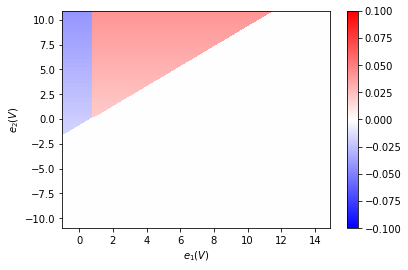

In [231]:
plt.set_cmap('bwr')
vmin = -0.1
vmax = 0.1
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
plt.pcolor(X, Y, Sign1,vmin=vmin, vmax=vmax, norm=norm)
plt.colorbar()
plt.xlabel('$e_1 (V)$')
plt.ylabel('$e_2 (V)$')
plt.savefig('curvature1.png',ppi=1000)

d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """
d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  """
d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error two minor releases later
  if __name__ == '_

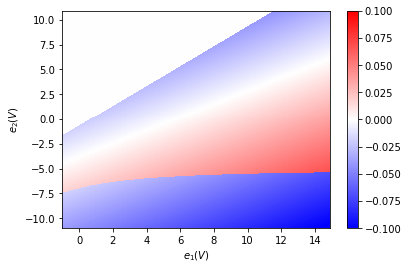

In [230]:
plt.set_cmap('bwr')
vmin = -0.1
vmax = 0.1
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
plt.pcolor(X, Y, Sign2,vmin=vmin, vmax=vmax, norm=norm)
plt.colorbar()
plt.xlabel('$e_1 (V)$')
plt.ylabel('$e_2 (V)$')
plt.savefig('curvature2.png',ppi=1000)

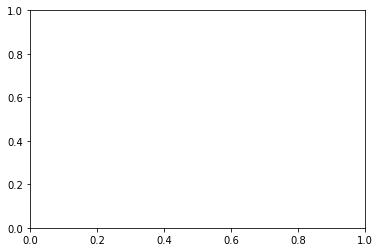

In [197]:
fig,ax = plt.subplots()

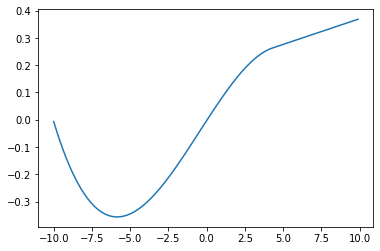

In [8]:

E2 = np.arange(-10,10,0.1)
E1 = np.zeros_like(E2)+5
Ids = []
for i in range(len(E1)):
    Ids.append(f5(E1[i],E2[i],LAMBDA))

Ids = np.array(Ids)
    
plt.plot(E2,Ids)

In [9]:
E2 = np.arange(0,10,0.1)
E1 = np.zeros_like(E2)+5
Ids = []
for i in range(len(E1)):
    Ids.append(f5(E1[i],E2[i],0.1))

Ids = np.array(Ids)
    
#plt.plot(E2,Ids)

In [10]:
F3Xp[4,13], F3Yp[4,13]

IndexError: index 13 is out of bounds for axis 1 with size 9

In [11]:
f5d1(3,-6,0.1)

-0.04799999999999999

In [12]:
f5d2(3,-6,0.1)

0.003133333333333309

In [13]:
#Xp,Yp

In [14]:
F2[5,12]

-0.008700000000000001

In [15]:
BETA*((2-vt)*(-5)-1/2*pow(-5,2)) * (1+0.1*(-5)) + (-5-9)/3e3

-0.19466666666666668

In [16]:
X[5,12],Y[5,12]

(0.19999999999999973, -10.500000000000002)

In [17]:
f1(2,-5,0.1)

-0.19

In [18]:
F1X[5,12],F1Y[5,12]

(0.010500000000000058, -0.10941666666666679)

In [40]:
EPSILON = 0.3

posp = np.array([3.,-3.])
pos = np.copy(posp) + 2
functionp = findFunction(pos[0],pos[1])
function = functionp + 2
print(posp)
while np.abs(pos[0]-posp[0])>1e-6 or np.abs(pos[0]-posp[0])>1e-6:
    pos = posp
    posp = posp + EPSILON * findDelta(posp[0],posp[1])
    function = functionp
    functionp = findFunction(pos[0],pos[1])
    print(posp,functionp)

[ 3. -3.]
[ 3.9        -1.32061856] [-0.1636 -0.0045]
[ 4.53       -0.70812713] [-0.09193511 -0.00315   ]
[ 4.971      -0.41232358] [-0.05829687 -0.002205  ]
[ 5.2797     -0.25035484] [-0.0385359 -0.0015435]
[ 5.49579    -0.15410581] [-0.02605145 -0.00108045]
[ 5.647053   -0.09376962] [-0.01783859 -0.00075631]
[ 5.7529371  -0.05458855] [-0.01230903 -0.00052942]
[ 5.82705597 -0.02853796] [-0.00853437 -0.00037059]
[ 5.87893918 -0.01093878] [-0.0059356  -0.00025942]
[5.91525743e+00 1.08121597e-03] [-0.00413663 -0.00018159]
[5.9406802  0.00935256] [-0.00288686 -0.00012711]
[5.95847614 0.01507396] [-2.01656522e-03 -8.89797034e-05]
[5.9709333  0.01904581] [-1.40953968e-03 -6.22857924e-05]
[5.97965331 0.02181003] [-9.85677460e-04 -4.36000547e-05]
[5.98575732 0.02373715] [-6.89486490e-04 -3.05200383e-05]
[5.99003012 0.02508232] [-4.82402381e-04 -2.13640268e-05]
[5.99302108 0.02602208] [-3.37565249e-04 -1.49548188e-05]
[5.99511476 0.02667899] [-2.36238727e-04 -1.04683731e-05]
[5.99658033 0.0271

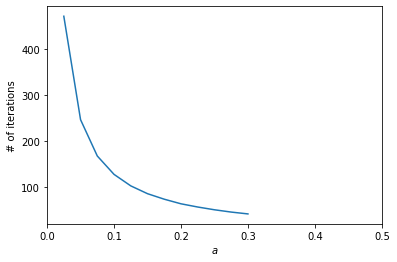

In [247]:
#iterations vs scaling factor without momentum

epsilons = np.arange(0.025,0.5,0.025)
iterations = []
starting_pos = np.array([0.,0.])
for epsilon in epsilons:
    posp = np.array([0.,0.])
    pos = np.copy(posp) + 2
    cnt = 0
    while (np.abs(pos[0]-posp[0])>1e-6 or np.abs(pos[0]-posp[0])>1e-6) and cnt < 10000:
        pos = posp
        posp = posp + epsilon * findDelta(posp[0],posp[1])
        cnt += 1
    if pos[1] > 0:
        iterations.append(cnt)
    else:
        iterations.append(None)
iterations = np.array(iterations)
plt.plot(epsilons[0:len(iterations)],iterations)
plt.xlim(0,0.5)
plt.xlabel('$a$')
plt.ylabel('# of iterations')
iterations
plt.savefig('circuit2.png',dpi=1000)

In [21]:
#iterations vs scaling factor with momentum

epsilons = np.arange(0.025,0.5,0.025)
# momentum_factors = np.arange(0.025,0.9,0.025)
momentum_factors = np.arange(0,0.6,0.1)
iterationsM = []
starting_pos = np.array([0.,0.])

row = -1
for epsilon in epsilons:
    row += 1
    iterationsM.append([])
    for momentum_factor in momentum_factors:
        posp = np.array([0.,0.])
        pos = np.copy(posp) + 2
        v = 0
        cnt = 0
        while (np.abs(pos[0]-posp[0])>1e-6 or np.abs(pos[0]-posp[0])>1e-6) and cnt < 10000:
            v = momentum_factor * v + findDelta(posp[0],posp[1])
            pos = posp
            posp = posp + epsilon * v
            cnt += 1
        if pos[1] > 0:
            iterationsM[row].append(cnt)
        else:
            iterationsM[row].append(None)
    iterationsM[row] = np.array(iterationsM[row],dtype='object')
        
iterationsM = np.array(iterationsM)
# plt.plot(epsilons[0:len(iterationsM)],iterationsM,c='k')
# iterationsM.shape
# [iterationsM[i].shape for i in range(len(iterationsM))]

In [219]:
#momentum test

EPSILON = 0.2
MOMENTUM_FACTOR1 = 0.
MOMENTUM_FACTOR2 = 0.3

posp1 = np.array([3.,3.])
pos1 = np.copy(posp1) + 2
pos1store = []
pos1store.append(posp1)
v = 0
print(posp1)
cnt1 = 0
functionp1 = findFunction(pos1[0],pos1[1])
function1 = functionp1 + 2
while np.abs(pos1[0]-posp1[0])>1e-6 or np.abs(pos1[1]-posp1[1])>1e-6:
    v = MOMENTUM_FACTOR1 * v + findDelta(posp1[0],posp1[1])
    pos1 = posp1
    posp1 = posp1 + EPSILON * v
    function1 = functionp1
    functionp1 = findFunction(pos1[0],pos1[1])
    cnt1 += 1
    print(posp1,functionp1)
    pos1store.append(posp1)
print(cnt1)

posp2 = np.array([3.,3.])
pos2 = np.copy(posp2) + 2
pos2store = []
pos2store.append(posp2)
v = 0
print(posp2)
cnt2 = 0
functionp2 = findFunction(pos2[0],pos2[1])
function2 = functionp2 + 2
while np.abs(pos2[0]-posp2[0])>1e-6 or np.abs(pos2[1]-posp2[1])>1e-6:
    v = MOMENTUM_FACTOR2 * v + findDelta(posp2[0],posp2[1])
    pos2 = posp2
    posp2 = posp2 + EPSILON * v
    function2 = functionp2
    functionp2 = findFunction(pos2[0],pos2[1])
    cnt2 += 1
    print(posp2,functionp2)
    pos2store.append(posp2)
print(cnt2)

[3. 3.]
[ 3.6        -2.93896261] [ 0.06677 -0.0045 ]
[ 4.08       -1.94105927] [-0.1853317 -0.0036   ]
[ 4.464      -1.36359839] [-0.13975666 -0.00288   ]
[ 4.7712     -0.98758658] [-0.10816718 -0.002304  ]
[ 5.01696    -0.72949107] [-0.08459099 -0.0018432 ]
[ 5.213568   -0.54604671] [-0.0665656  -0.00147456]
[ 5.3708544  -0.41225916] [-0.05260166 -0.00117965]
[ 5.49668352 -0.31274285] [-0.04169129 -0.00094372]
[ 5.59734682 -0.23757607] [-0.033116   -0.00075497]
[ 5.67787745 -0.18011672] [-0.02634722 -0.00060398]
[ 5.74230196 -0.13577805] [-0.02098761 -0.00048318]
[ 5.79384157 -0.10130925] [-0.01673387 -0.00038655]
[ 5.83507326 -0.07435571] [-0.01335187 -0.00030924]
[ 5.8680586  -0.05318078] [-0.01065932 -0.00024739]
[ 5.89444688 -0.03648417] [-0.00851345 -0.00019791]
[ 5.91555751 -0.02328013] [-0.0068019  -0.00015833]
[ 5.93244601 -0.01281374] [-0.00543589 -0.00012666]
[ 5.94595680e+00 -4.50196787e-03] [-0.00434514 -0.00010133]
[5.95676544e+00 2.10850963e-03] [-3.47383317e-03 -8.1064

d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


(array([[ 3.00000000e+00,  3.60000000e+00,  4.08000000e+00,
          4.46400000e+00,  4.77120000e+00,  5.01696000e+00,
          5.21356800e+00,  5.37085440e+00,  5.49668352e+00,
          5.59734682e+00,  5.67787745e+00,  5.74230196e+00,
          5.79384157e+00,  5.83507326e+00,  5.86805860e+00,
          5.89444688e+00,  5.91555751e+00,  5.93244601e+00,
          5.94595680e+00,  5.95676544e+00,  5.96541235e+00,
          5.97232988e+00,  5.97786391e+00,  5.98229113e+00,
          5.98583290e+00,  5.98866632e+00,  5.99093306e+00,
          5.99274645e+00,  5.99419716e+00,  5.99535772e+00,
          5.99628618e+00,  5.99702894e+00,  5.99762316e+00,
          5.99809852e+00,  5.99847882e+00,  5.99878306e+00,
          5.99902644e+00,  5.99922116e+00,  5.99937692e+00,
          5.99950154e+00,  5.99960123e+00,  5.99968099e+00,
          5.99974479e+00,  5.99979583e+00,  5.99983666e+00,
          5.99986933e+00,  5.99989547e+00,  5.99991637e+00,
          5.99993310e+00,  5.99994648e+0

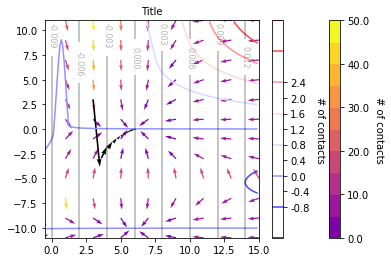

In [221]:
fig,ax = plt.subplots()


#colormap
norm = cm.Normalize(vmin=0,vmax=50,clip=False)
cmap = cm.ListedColormap(plt.cm.plasma(np.linspace(0.25,1,10)), "name")


plt.rcParams['contour.negative_linestyle'] = 'solid'
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"


normCS = cm.Normalize(vmin=-0.4,vmax=1.2,clip=False)
CS = ax.contour(X,Y,F1)#levels=np.arange(-2,10,0.5))  #x-axis: e1, y-axis: e2
#divnorm = colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
#cmap2 = cm.ListedColormap(plt.cm.RdBu(np.linspace(0.25,1,10)), "name")
normCS2 = cm.Normalize(vmin=-0.005,vmax=0.005,clip=False)
CS2 = ax.contour(X,Y,F2,colors='k',alpha=0.3)#cmap=plt.cm.PuOr,norm=norm2,)#,levels=np.arange(-2,10,0.5))  #x-axis: e1, y-axis: e2

#q = ax.quiver(Xp, Yp, F3Xp, F3Yp, units='xy',color='red',scale=1)
q = ax.quiver(Xp, Yp, quiverX, quiverY,mag,units='xy',scale=1,cmap=cmap,norm=norm)
cb = plt.colorbar(q, ticks=np.arange(0,51,10), format='%.1f', norm=norm)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('# of contacts', rotation=270)
# q = ax.quiver(X, Y, F2X, F2Y, units='xy' ,scale=1, color='blue')

XYposp1 = np.array(pos1store[0:len(pos1store)-1]).transpose()
Qposp1 = np.array(pos1store[1:len(pos1store)]).transpose()
Qposp1 = Qposp1-XYposp1
qR = ax.quiver(XYposp1[0],XYposp1[1],Qposp1[0],Qposp1[1],units='xy',scale=1)

cbCS = plt.colorbar(CS, ticks=np.arange(-0.8,2.5,0.4), format='%.1f', norm=normCS)
cbCS.ax.get_yaxis().labelpad = 15
cbCS.ax.set_ylabel('# of contacts', rotation=270)


#ax.clabel(CS, fontsize=8, inline=True)
ax.clabel(CS2, fontsize=8, inline=True)
# ax.contour(X,Y,F2,levels=np.arange(-20,20,4),colors = 'blue')

# ax.set_aspect('equal')

plt.xlim(-0.5,15)
plt.ylim(-11,11)

plt.title('Title',fontsize=10)


ax.set_aspect='equal'
plt.savefig('circuit1.png',dpi=1000)

XYposp1, Qposp1

d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


(array([[ 3.        ,  3.6       ,  4.26      ,  4.806     ,  5.2086    ,
          5.48766   ,  5.673846  ,  5.7949326 ,  5.87227206,  5.92101949,
          5.95143982,  5.97027795,  5.9818738 ,  5.9889778 ,  5.99331344,
          5.99595144,  5.99755255,  5.99852238,  5.99910885,  5.99946302,
          5.99967667,  5.99980543,  5.99988297,  5.99992964,  5.99995771,
          5.99997459,  5.99998474,  5.99999083,  5.9999945 ,  5.9999967 ,
          5.99999802],
        [ 3.        , -2.93896261, -3.72274805, -2.63903085, -1.57850838,
         -0.87624816, -0.46448352, -0.23580429, -0.11223173, -0.04636491,
         -0.01146013,  0.00701986,  0.01682599,  0.02205235,  0.02485418,
          0.02636652,  0.02718899,  0.0276398 ,  0.0278889 ,  0.02802763,
          0.02810551,  0.02814955,  0.02817463,  0.028189  ,  0.02819729,
          0.0282021 ,  0.0282049 ,  0.02820654,  0.0282075 ,  0.02820806,
          0.0282084 ]]),
 array([[ 6.00000000e-01,  6.60000000e-01,  5.46000000e-01,
    

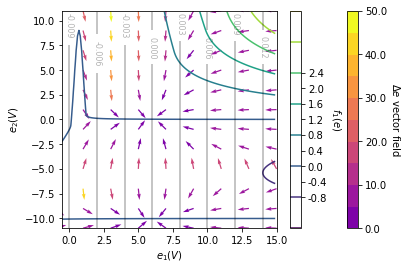

In [229]:
fig,ax = plt.subplots()


#colormap
norm = cm.Normalize(vmin=0,vmax=50,clip=False)
cmap = cm.ListedColormap(plt.cm.plasma(np.linspace(0.25,1,10)), "name")


plt.rcParams['contour.negative_linestyle'] = 'solid'
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

plt.set_cmap('viridis')

normCS = cm.Normalize(vmin=-0.4,vmax=1.2,clip=False)
CS = ax.contour(X,Y,F1)#levels=np.arange(-2,10,0.5))  #x-axis: e1, y-axis: e2
#divnorm = colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
#cmap2 = cm.ListedColormap(plt.cm.RdBu(np.linspace(0.25,1,10)), "name")
normCS2 = cm.Normalize(vmin=-0.005,vmax=0.005,clip=False)
CS2 = ax.contour(X,Y,F2,colors='k',alpha=0.3)#cmap=plt.cm.PuOr,norm=norm2,)#,levels=np.arange(-2,10,0.5))  #x-axis: e1, y-axis: e2

#q = ax.quiver(Xp, Yp, F3Xp, F3Yp, units='xy',color='red',scale=1)
q = ax.quiver(Xp, Yp, quiverX, quiverY,mag,units='xy',scale=1,cmap=cmap,norm=norm)
cb = plt.colorbar(q, ticks=np.arange(0,51,10), format='%.1f', norm=norm)
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('$\Delta e$ vector field', rotation=270)
# q = ax.quiver(X, Y, F2X, F2Y, units='xy' ,scale=1, color='blue')

XYposp2 = np.array(pos2store[0:len(pos2store)-1]).transpose()
Qposp2 = np.array(pos2store[1:len(pos2store)]).transpose()
Qposp2 = Qposp2 - XYposp2
# qR = ax.quiver(XYposp2[0],XYposp2[1],Qposp2[0],Qposp2[1],units='xy',scale=1)

cbCS = plt.colorbar(CS, ticks=np.arange(-0.8,2.5,0.4), format='%.1f', norm=normCS)
cbCS.ax.get_yaxis().labelpad = 15
cbCS.ax.set_ylabel('$f_1(e)$', rotation=270)


#ax.clabel(CS, fontsize=8, inline=True)
ax.clabel(CS2, fontsize=8, inline=True)
# ax.contour(X,Y,F2,levels=np.arange(-20,20,4),colors = 'blue')

# ax.set_aspect('equal')

plt.xlim(-0.5,15)
# plt.xlim(5,7.5)
plt.ylim(-11,11)
# plt.ylim(-1,1)


ax.set_aspect='equal'
plt.xlabel('$e_1 (V)$')
plt.ylabel('$e_2 (V)$')
plt.savefig('circuit1.png',dpi=1000)

XYposp2, Qposp2

d:\program files\python interpretors\python 36\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


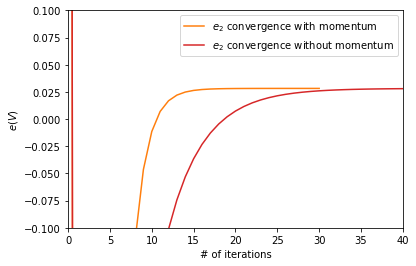

In [235]:
plt.plot([i for i in range(len(XYposp2[0]))],XYposp2[0])#,label='$e_1$ convergence with momentum')
plt.plot([i for i in range(len(XYposp2[1]))],XYposp2[1],label='$e_2$ convergence with momentum')
plt.plot([i for i in range(len(XYposp1[0]))],XYposp1[0])#,label='$e_1$ convergence without momentum')
plt.plot([i for i in range(len(XYposp1[1]))],XYposp1[1],label='$e_2$ convergence without momentum')
plt.xlim(0,40)
plt.legend()
plt.ylim(-0.1,0.1)
plt.xlabel('# of iterations')
plt.ylabel('$e (V)$')
plt.savefig('sample_case2',ppi=1000)
# plt.ylim(0.01,0.04)


(-1.0, 1.0)

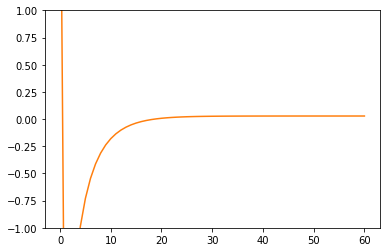

In [232]:
plt.plot([i for i in range(len(XYposp1[0]))],XYposp1[0])
plt.plot([i for i in range(len(XYposp1[1]))],XYposp1[1])
# plt.xlim(10,)
plt.ylim(-1,1)

(-5.0, 150.0)

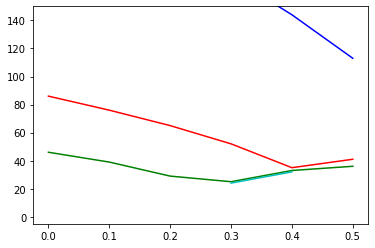

In [24]:
#graph iterations vs momentum factor with momentum

plt.plot(momentum_factors[0:len(iterationsM[0])],iterationsM[0],c='k')  #EPSILON=0.025
plt.plot(momentum_factors[0:len(iterationsM[1])],iterationsM[1],c='b')
plt.plot(momentum_factors[0:len(iterationsM[5])],iterationsM[5],c='r')
plt.plot(momentum_factors[0:len(iterationsM[10])],iterationsM[10],c='g')
plt.plot(momentum_factors[0:len(iterationsM[13])],iterationsM[13],c='c')
plt.ylim(-5,150)

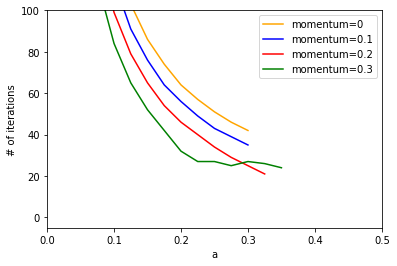

In [251]:
#graph iterations vs scaling factor with momentum

iterationsE = iterationsM.transpose()

plt.plot(epsilons[0:len(iterationsE[0])],iterationsE[0],c='orange',label='momentum=0')  #MOMENTUM=0.
plt.plot(epsilons[0:len(iterationsE[1])],iterationsE[1],c='b',label='momentum=0.1')  #MOMENTUM=0.1
plt.plot(epsilons[0:len(iterationsE[2])],iterationsE[2],c='r',label='momentum=0.2')  #MOMENTUM=0.2
plt.plot(epsilons[0:len(iterationsE[3])],iterationsE[3],c='g',label='momentum=0.3')  #MOMENTUM=0.3
plt.ylim(-5,100)
plt.xlim(0,0.5)
plt.xlabel('a')
plt.legend()
plt.ylabel('# of iterations')
plt.savefig('circuit3.png',dpi=1000)

In [26]:
iterationsM.shape

(19, 6)

(array([0, 1, 2, 3, 4, 5]), array([1, 3, 4, None, 2, 4], dtype=object))

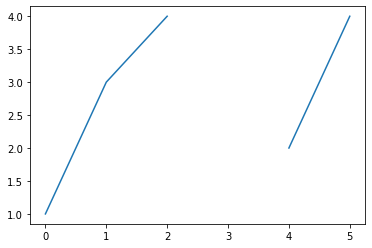

In [27]:
X = np.arange(0,6,1)
Y = np.array([1,3,4,None,2,4])
plt.plot(X,Y)
X,Y